In [33]:
import sys
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import talib
import torch.utils.data as Data
import mplfinance as mpf

In [2]:
sys.path.append('../../')
import  DataSource
import Utils
zz500 = DataSource.get_zz500_codes() # 我看中证500的数据

In [6]:
dt = DataSource.get_data(zz500[0])
dt.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,,,
2010-01-04,sh.600004,5.046509,5.111144,5.041537,5.046509,5.046509,15478854,157747809.0,2,1.525010,1,0.0000,0
2010-01-05,sh.600004,5.046509,5.091256,5.041537,5.066397,5.046509,11070922,112683563.0,2,1.090731,1,0.3941,0
2010-01-06,sh.600004,5.056453,5.066397,4.981874,4.991818,5.066397,9410665,95205863.0,2,0.927159,1,-1.4720,0
2010-01-07,sh.600004,4.971930,4.996790,4.827744,4.862548,4.991818,8961813,88611912.0,2,0.882937,1,-2.5896,0
2010-01-08,sh.600004,4.837688,5.096228,4.837688,5.061425,4.862548,14923812,149969456.0,2,1.470326,1,4.0900,0


In [45]:
# 我这里要看看区域最高值和最低值
window_no = 10
dt['wav_top'] = dt['high'].rolling(window=window_no).max() == dt['high']
dt['wav_down'] = dt['low'].rolling(window=window_no).min() == dt['low']

dt['wav_top_2'] = dt.apply(lambda row: row['high'] * 1.01 if row['wav_top'] else None, axis=1)
dt['wav_down_2'] = dt.apply(lambda row: row['low'] * 0.99 if row['wav_down'] else None, axis=1)

In [46]:
dt.tail(100)

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,wav_top,wav_down,wav_top_2,wav_down_2
date,,,,,,,,,,,,,,,,,
2024-09-26,sh.600004,9.09,9.48,9.03,9.48,9.09,24791452,2.303078e+08,2,1.0475,1,4.2904,0,True,False,9.5748,NaN
2024-09-27,sh.600004,9.58,9.81,9.58,9.78,9.48,24280514,2.356350e+08,2,1.0259,1,3.1646,0,True,False,9.9081,NaN
2024-09-30,sh.600004,10.10,10.55,9.88,10.46,9.78,84382557,8.638255e+08,2,3.5654,1,6.9530,0,True,False,10.6555,NaN
2024-10-08,sh.600004,11.48,11.48,10.10,10.50,10.46,94665195,1.014063e+09,2,3.9999,1,0.3824,0,True,False,11.5948,NaN
2024-10-09,sh.600004,10.34,10.34,9.81,9.84,10.50,49137895,4.922364e+08,2,2.0762,1,-6.2857,0,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,sh.600004,9.12,9.18,9.10,9.17,9.13,14626156,1.337640e+08,2,0.6180,1,0.4381,0,False,False,NaN,NaN
2025-02-25,sh.600004,9.14,9.15,9.07,9.09,9.17,15012850,1.366958e+08,2,0.6343,1,-0.8724,0,False,False,NaN,NaN
2025-02-26,sh.600004,9.10,9.13,9.07,9.13,9.09,14994485,1.363845e+08,2,0.6336,1,0.4400,0,False,False,NaN,NaN


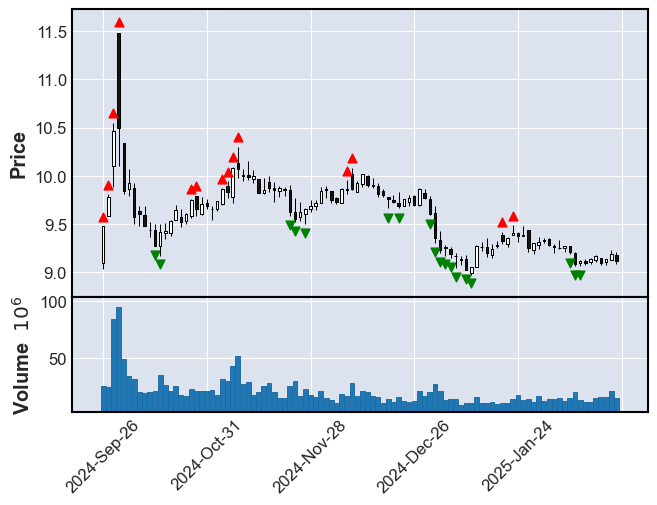

In [48]:
add_plot = [
    mpf.make_addplot(dt['wav_top_2'][-100:], scatter=True, markersize=40, marker='^', color='r'),
    mpf.make_addplot(dt['wav_down_2'][-100:], scatter=True, markersize=40, marker='v', color='g')
]

mpf.plot(dt[-100:], type='candle',addplot=add_plot, volume=True)

In [36]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']